# Part 1:
Use proper data cleansing techniques to ensure 
that you have the highest quality data to model this problem. Detail your process 
and discuss the decisions you made to clean the data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/kejiangyao/Desktop/ALY 6020/Module 4/week 4 - Nashville_housing_data.csv')

In [3]:
#Display top 5 rows of dataset
df.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [4]:
#check missing value
pd.DataFrame(df.isnull().sum())

,0
Unnamed: 0,0
Parcel ID,0
Land Use,0
Property Address,2
Suite/ Condo #,22651
Property City,2
Sale Date,0
Legal Reference,0
Sold As Vacant,0
Multiple Parcels Involved in Sale,0


In [5]:
#Drop Suite/ Condo # column
df = df.drop(columns = ['Suite/ Condo   #'])

In [6]:
#drop all records with at least 1 na value
df = df.dropna()

In [7]:
#convert sale date into year, month, day
df['Sale Date'] = pd.to_datetime(df['Sale Date'])
df['Year_Sale'] = df['Sale Date'].apply(lambda x: x.year)
df['Month_Sale'] = df['Sale Date'].apply(lambda x: x.month)
df['Day_Sale'] = df['Sale Date'].apply(lambda x: x.day)
df = df.drop('Sale Date', axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22536 entries, 0 to 22650
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22536 non-null  int64  
 1   Parcel ID                          22536 non-null  object 
 2   Land Use                           22536 non-null  object 
 3   Property Address                   22536 non-null  object 
 4   Property City                      22536 non-null  object 
 5   Legal Reference                    22536 non-null  object 
 6   Sold As Vacant                     22536 non-null  object 
 7   Multiple Parcels Involved in Sale  22536 non-null  object 
 8   City                               22536 non-null  object 
 9   State                              22536 non-null  object 
 10  Acreage                            22536 non-null  float64
 11  Tax District                       22536 non-null  obj

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

[None, None, None, None, None, None, None, None]

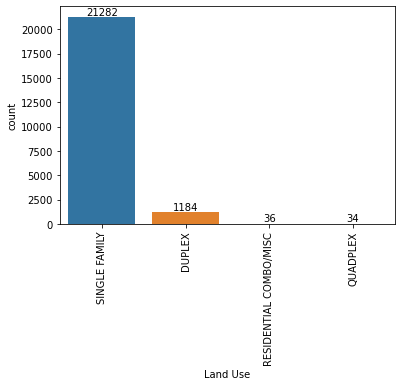

In [10]:
#Land Use
plot = sns.countplot(x=df["Land Use"])
plot.bar_label(plot.containers[0])
plt.setp(plot.get_xticklabels(), rotation=90)

[Text(0, 0, '17925'),
 Text(0, 0, '1133'),
 Text(0, 0, '158'),
 Text(0, 0, '1145'),
 Text(0, 0, '797'),
 Text(0, 0, '913'),
 Text(0, 0, '435'),
 Text(0, 0, '11'),
 Text(0, 0, '13'),
 Text(0, 0, '6')]

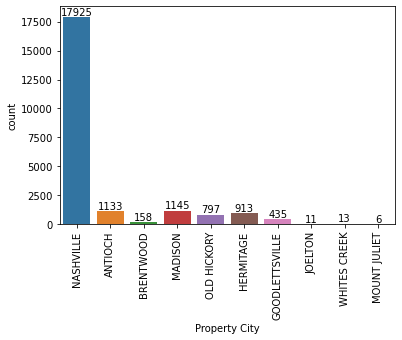

In [11]:
#Property City
plot = sns.countplot(x=df["Property City"])
plt.setp(plot.get_xticklabels(), rotation=90)
plot.bar_label(plot.containers[0])

[Text(0, 0, '17926'),
 Text(0, 0, '1133'),
 Text(0, 0, '157'),
 Text(0, 0, '1145'),
 Text(0, 0, '797'),
 Text(0, 0, '913'),
 Text(0, 0, '435'),
 Text(0, 0, '11'),
 Text(0, 0, '13'),
 Text(0, 0, '6')]

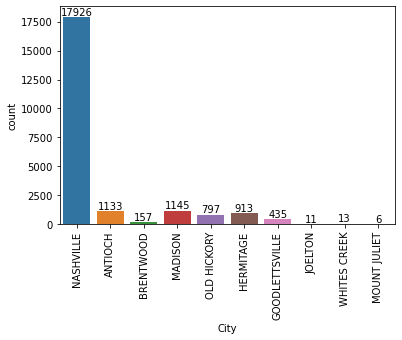

In [12]:
#City
plot = sns.countplot(x=df["City"])
plt.setp(plot.get_xticklabels(), rotation=90)
plot.bar_label(plot.containers[0])

In [13]:
df = df.drop(columns = ['City'])

[Text(0, 0, '4860'),
 Text(0, 0, '5716'),
 Text(0, 0, '6387'),
 Text(0, 0, '5573')]

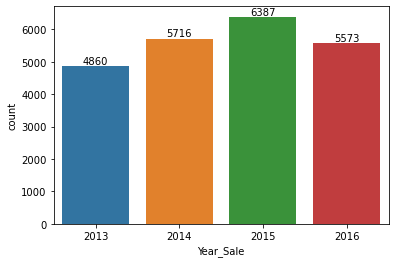

In [14]:
#sale year
plot = sns.countplot(x=df["Year_Sale"])
plot.bar_label(plot.containers[0])

[Text(0, 0, '1206'),
 Text(0, 0, '1145'),
 Text(0, 0, '1824'),
 Text(0, 0, '2051'),
 Text(0, 0, '2353'),
 Text(0, 0, '2667'),
 Text(0, 0, '2259'),
 Text(0, 0, '2218'),
 Text(0, 0, '2099'),
 Text(0, 0, '1995'),
 Text(0, 0, '1263'),
 Text(0, 0, '1456')]

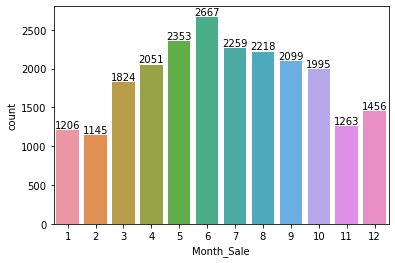

In [15]:
#sale month
plot = sns.countplot(x=df["Month_Sale"])
plot.bar_label(plot.containers[0])

[Text(0, 0, '771'),
 Text(0, 0, '577'),
 Text(0, 0, '569'),
 Text(0, 0, '548'),
 Text(0, 0, '579'),
 Text(0, 0, '600'),
 Text(0, 0, '572'),
 Text(0, 0, '638'),
 Text(0, 0, '578'),
 Text(0, 0, '730'),
 Text(0, 0, '605'),
 Text(0, 0, '704'),
 Text(0, 0, '651'),
 Text(0, 0, '779'),
 Text(0, 0, '1160'),
 Text(0, 0, '719'),
 Text(0, 0, '688'),
 Text(0, 0, '710'),
 Text(0, 0, '701'),
 Text(0, 0, '733'),
 Text(0, 0, '659'),
 Text(0, 0, '748'),
 Text(0, 0, '618'),
 Text(0, 0, '715'),
 Text(0, 0, '780'),
 Text(0, 0, '701'),
 Text(0, 0, '662'),
 Text(0, 0, '919'),
 Text(0, 0, '923'),
 Text(0, 0, '1302'),
 Text(0, 0, '897')]

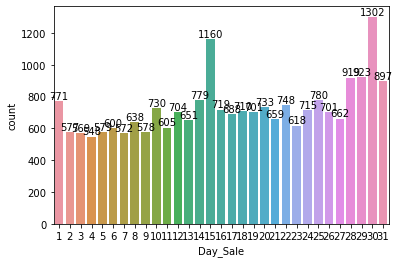

In [16]:
#sale day
plot = sns.countplot(x=df["Day_Sale"])
plot.bar_label(plot.containers[0])

[Text(0, 0, '22402'), Text(0, 0, '134')]

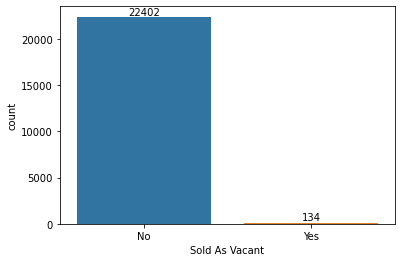

In [17]:
#Sold As Vacant
plot = sns.countplot(x=df["Sold As Vacant"])
plot.bar_label(plot.containers[0])

In [18]:
#Convert yes to 1 and no to 0
df['Sold As Vacant'] = df['Sold As Vacant'].map({'Yes': 1, 'No': 0})

[Text(0, 0, '22069'), Text(0, 0, '467')]

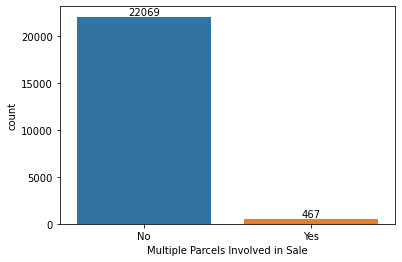

In [19]:
#Multiple Parcels Involved in Sale
plot = sns.countplot(x=df["Multiple Parcels Involved in Sale"])
plot.bar_label(plot.containers[0])

In [20]:
#Convert yes to 1 and no to 0
df['Multiple Parcels Involved in Sale'] = df['Multiple Parcels Involved in Sale'].map({'Yes': 1, 'No': 0})

[Text(0, 0, '22536')]

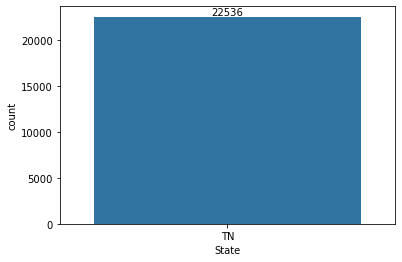

In [21]:
#State
plot = sns.countplot(x=df["State"])
plot.bar_label(plot.containers[0])

In [22]:
#drop state column
df = df.drop(columns = ['State'])

<AxesSubplot:ylabel='Acreage'>

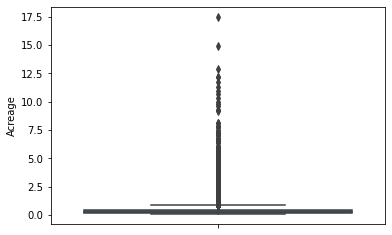

In [23]:
#Acreage
sns.boxplot(y=df["Acreage"])

[Text(0, 0, '17411'),
 Text(0, 0, '21'),
 Text(0, 0, '3853'),
 Text(0, 0, '214'),
 Text(0, 0, '348'),
 Text(0, 0, '345'),
 Text(0, 0, '344')]

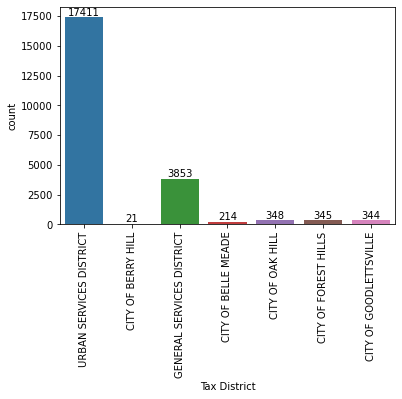

In [24]:
#Tax District
plot = sns.countplot(x=df["Tax District"])
plt.setp(plot.get_xticklabels(), rotation=90)
plot.bar_label(plot.containers[0])

<AxesSubplot:ylabel='Neighborhood'>

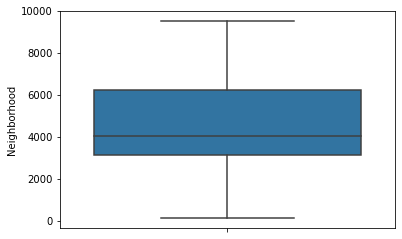

In [25]:
#Neighborhood
sns.boxplot(y=df["Neighborhood"])

<AxesSubplot:xlabel='Land Value', ylabel='Count'>

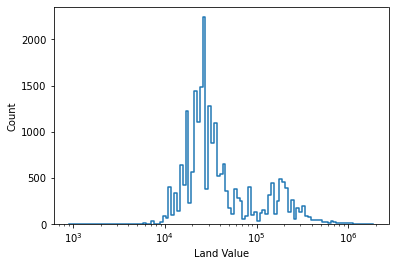

In [26]:
#Land Value
sns.histplot(data=df, x="Land Value", log_scale=True, element="step", fill=False)

<AxesSubplot:xlabel='Building Value', ylabel='Count'>

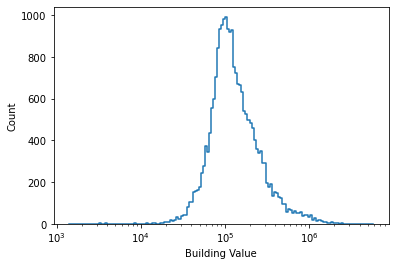

In [27]:
#Building Value
sns.histplot(data=df, x="Building Value", log_scale=True, element="step", fill=False)

<AxesSubplot:xlabel='Finished Area', ylabel='Count'>

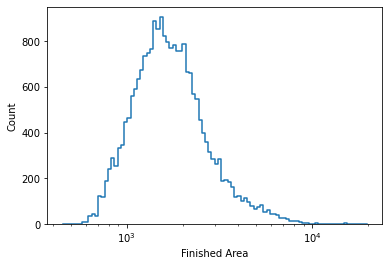

In [28]:
#Finished Area
sns.histplot(data=df, x="Finished Area", log_scale=True, element="step", fill=False)

[Text(0, 0, '3121'),
 Text(0, 0, '1427'),
 Text(0, 0, '3802'),
 Text(0, 0, '14148'),
 Text(0, 0, '36'),
 Text(0, 0, '2')]

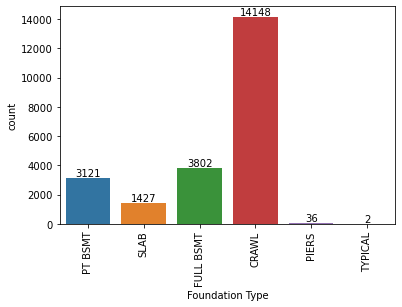

In [29]:
#Foundation Type
plot = sns.countplot(x=df["Foundation Type"])
plt.setp(plot.get_xticklabels(), rotation=90)
plot.bar_label(plot.containers[0])

<AxesSubplot:ylabel='Year Built'>

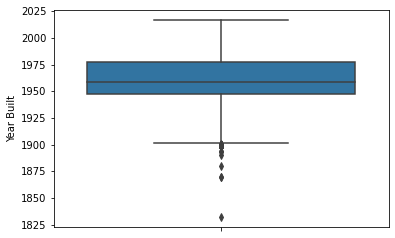

In [30]:
#Year Built
sns.boxplot(y=df["Year Built"])

[Text(0, 0, '11512'),
 Text(0, 0, '2217'),
 Text(0, 0, '8098'),
 Text(0, 0, '104'),
 Text(0, 0, '328'),
 Text(0, 0, '156'),
 Text(0, 0, '99'),
 Text(0, 0, '15'),
 Text(0, 0, '7')]

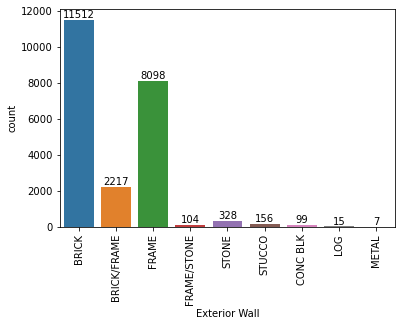

In [31]:
#Exterior Wall 
plot = sns.countplot(x=df["Exterior Wall"])
plt.setp(plot.get_xticklabels(), rotation=90)
plot.bar_label(plot.containers[0])

[Text(0, 0, '16162'),
 Text(0, 0, '3375'),
 Text(0, 0, '1911'),
 Text(0, 0, '547'),
 Text(0, 0, '482'),
 Text(0, 0, '57'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

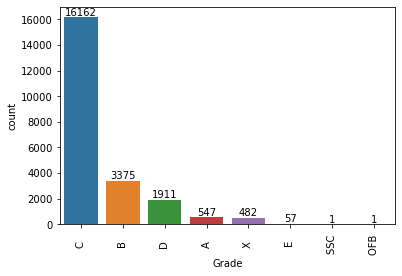

In [32]:
#Grade
plot = sns.countplot(x=df["Grade"])
plt.setp(plot.get_xticklabels(), rotation=90)
plot.bar_label(plot.containers[0])

<AxesSubplot:ylabel='Bedrooms'>

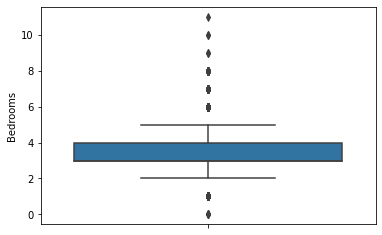

In [33]:
#Bedrooms
sns.boxplot(y=df["Bedrooms"])

<AxesSubplot:ylabel='Full Bath'>

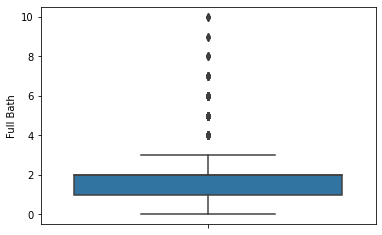

In [34]:
#Full Bath
sns.boxplot(y=df["Full Bath"])

<AxesSubplot:ylabel='Half Bath'>

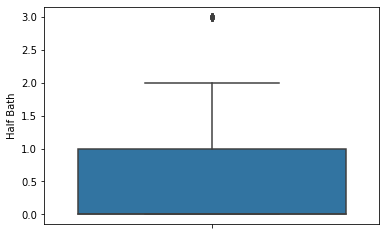

In [35]:
#Half Bath
sns.boxplot(y=df["Half Bath"])

[Text(0, 0, '16979'), Text(0, 0, '5557')]

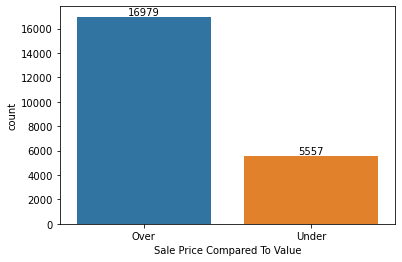

In [36]:
#Sale Price Compared To Value
plot = sns.countplot(x=df["Sale Price Compared To Value"])
plot.bar_label(plot.containers[0])

In [37]:
#Convert over to 1 and under to 0
df['Sale Price Compared To Value'] = df['Sale Price Compared To Value'].map({'Over': 1, 'Under': 0})

In [38]:
#convert categorical variables into dummy variable
df = pd.get_dummies(df, columns=['Land Use','Property City','Tax District','Foundation Type','Exterior Wall','Grade'])

In [39]:
df = df.drop(columns = ['Unnamed: 0','Parcel ID','Property Address','Legal Reference'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22536 entries, 0 to 22650
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Sold As Vacant                          22536 non-null  int64  
 1   Multiple Parcels Involved in Sale       22536 non-null  int64  
 2   Acreage                                 22536 non-null  float64
 3   Neighborhood                            22536 non-null  int64  
 4   Land Value                              22536 non-null  int64  
 5   Building Value                          22536 non-null  int64  
 6   Finished Area                           22536 non-null  float64
 7   Year Built                              22536 non-null  int64  
 8   Bedrooms                                22536 non-null  float64
 9   Full Bath                               22536 non-null  float64
 10  Half Bath                               22536 non-null  fl

# Part 2:

Build a linear regression model to accurately predict housing prices and determine what is driving those prices.

In [41]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [42]:
X = df.drop(columns = ['Sale Price Compared To Value'])

y = df['Sale Price Compared To Value']

In [43]:
#Train, test split, sets aside 33% of the samples in the original dataset for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [44]:
#Logistic regression model fitting
LR = LogisticRegression(max_iter=2000)
LR_Model = LR.fit(X_train,y_train)
print(LR_Model.score(X_train,y_train))

0.754619511225909


In [86]:
from sklearn.feature_selection import RFE

In [87]:
LR = LogisticRegression(max_iter=2000)

LR_rfe_model=RFE(estimator=LR)

LR_rfe_model_fit=LR_rfe_model.fit(X_train,y_train)

feat_index = pd.Series(data = LR_rfe_model_fit.ranking_, index = X_train.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print('Significant features from RFE',signi_feat_rfe)

Significant features from RFE Index(['Sold As Vacant', 'Acreage', 'Neighborhood', 'Land Value',
       'Building Value', 'Finished Area', 'Year Built', 'Bedrooms',
       'Year_Sale', 'Month_Sale', 'Day_Sale', 'Land Use_DUPLEX',
       'Land Use_SINGLE FAMILY', 'Property City_ANTIOCH',
       'Property City_HERMITAGE', 'Property City_MADISON',
       'Property City_NASHVILLE', 'Property City_OLD HICKORY',
       'Tax District_CITY OF BELLE MEADE',
       'Tax District_GENERAL SERVICES DISTRICT',
       'Tax District_URBAN SERVICES DISTRICT', 'Foundation Type_CRAWL',
       'Foundation Type_SLAB', 'Exterior Wall_BRICK',
       'Exterior Wall_BRICK/FRAME', 'Exterior Wall_FRAME', 'Grade_A   ',
       'Grade_C   ', 'Grade_D   '],
      dtype='object')


In [45]:
# Test out of sample prediction 
y_pred = LR.predict(X_test)

#Display confusion matrix
cm_LR = confusion_matrix(y_test, y_pred)

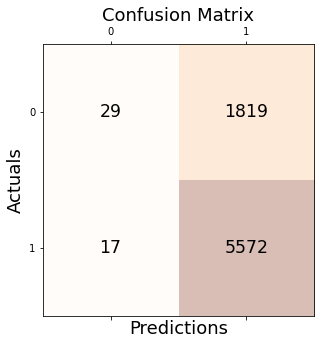

In [46]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_LR, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm_LR.shape[0]):
    for j in range(cm_LR.shape[1]):
        ax.text(x=j, y=i,s=cm_LR[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [47]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.753


In [48]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.754


In [49]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.997


# Part 3:

Build a decision tree model and compare the results with the results of the previous model.

In [50]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from matplotlib import pyplot

In [51]:
#Apply decision tree
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
print(DT.score(X_train,y_train))

0.9998013113451222


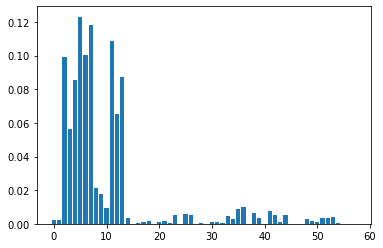

In [52]:
# get importance
importance = DT.feature_importances_
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [53]:
pd.DataFrame(importance).sort_values(by = 0, ascending=False)

,0
5,0.123100
7,0.118247
11,0.108457
6,0.100356
2,0.099267
13,0.086975
4,0.085692
12,0.065419
3,0.056430
8,0.021328


In [54]:
# Test out of sample prediction 
y_pred = DT.predict(X_test)

#Display confusion matrix
cm_DT = confusion_matrix(y_test, y_pred)

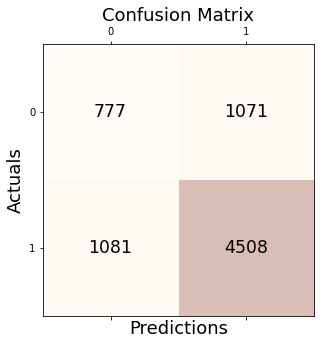

In [55]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_DT, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm_DT.shape[0]):
    for j in range(cm_DT.shape[1]):
        ax.text(x=j, y=i,s=cm_DT[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [56]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.711


In [57]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.808


In [58]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.807


# Part 4:

Build a Random Forest model and compare the results with the results of the previous models.

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))

0.9998013113451222


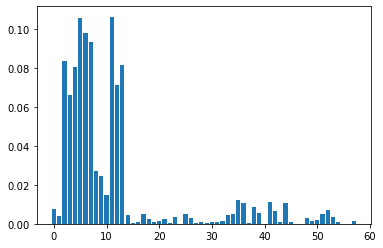

In [61]:
# get importance
importance = rf.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [62]:
pd.DataFrame(importance).sort_values(by = 0, ascending=False)

,0
11,0.106355
5,0.105517
6,0.097936
7,0.093483
2,0.083713
13,0.081438
4,0.080576
12,0.071321
3,0.065904
8,0.027118


In [63]:
# Test out of sample prediction 
y_pred = rf.predict(X_test)

#Display confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)

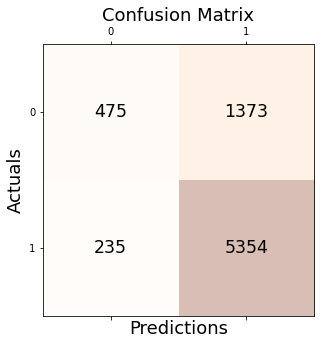

In [64]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_rf, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        ax.text(x=j, y=i,s=cm_rf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [65]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.784


In [66]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.796


In [67]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.958


# Part 5:

Build a Gradient Boost model and compare the results with the results of the previous models.

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
print(gb.score(X_train,y_train))

0.8006490496059342


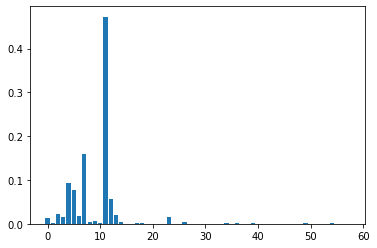

In [77]:
# get importance
importance = gb.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15099 entries, 7222 to 236
Data columns (total 58 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Sold As Vacant                          15099 non-null  int64  
 1   Multiple Parcels Involved in Sale       15099 non-null  int64  
 2   Acreage                                 15099 non-null  float64
 3   Neighborhood                            15099 non-null  int64  
 4   Land Value                              15099 non-null  int64  
 5   Building Value                          15099 non-null  int64  
 6   Finished Area                           15099 non-null  float64
 7   Year Built                              15099 non-null  int64  
 8   Bedrooms                                15099 non-null  float64
 9   Full Bath                               15099 non-null  float64
 10  Half Bath                               15099 non-null  f

In [78]:
pd.DataFrame(importance).sort_values(by = 0, ascending=False)

,0
11,0.472730
7,0.160304
4,0.093279
5,0.077011
12,0.056348
2,0.022303
13,0.019740
6,0.018027
23,0.015732
3,0.015195


In [70]:
# Test out of sample prediction 
y_pred = gb.predict(X_test)

#Display confusion matrix
cm_gb = confusion_matrix(y_test, y_pred)

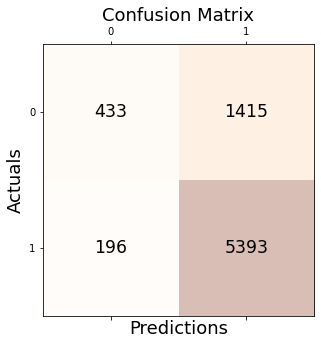

In [71]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_gb, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm_gb.shape[0]):
    for j in range(cm_gb.shape[1]):
        ax.text(x=j, y=i,s=cm_gb[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [72]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.783


In [73]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.792


In [74]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.965


# Part 6:

Use multiple benchmarking metrics to compare and contrast the three models. Based on your findings, provide evidence of which model you believe the real estate company should use.